In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


# Equations from Bishop (pt. 2):


We are not usually interested in the value of $\mathbf{w}$ itself but rather in making predictions of $t$ for new values of **x**. This requires that we evaluate the
predictive distribution defined by
$$ p(t|\mathbf{t},\alpha,\beta) = \int p(t|\mathbf{w},\beta)p(\mathbf{w}|\mathbf{t},\alpha,\beta)d\mathbf{w} \tag{3.57}$$
in which $\mathbf{t}$ is the vector of target values from the training set. We will also see that the variance of the predictive distribution is given by 
$$ \sigma_N^2(\mathbf{x}) = \frac{1}{\beta} + \phi(\mathbf{x})^{\text{T}}\mathbf{S}_n\phi(\mathbf{x}) \tag{3.59}$$

For our design matrix $\Phi$, we will use Gaussian basis functions:
$$ \phi_{j}(x) = exp\{- \frac{(x - \mu_{j})^{2}}{2s^{2}}\} \tag{3.4}$$


In [6]:
def generate_data(beta, X):
    N = len(X)
    noise = np.random.normal(0, np.sqrt(1/beta), N)
    y = np.sin(2*np.pi*X) + noise
    return y

In [12]:
def getParams(X, y, m0, s0, beta, bmeans, bSD):

    phi = np.zeros((len(X), 9))
    v_y = y.reshape(y.shape + (1,))

    # Equation 3.4
    for i in range(phi.shape[1]):
        phi[:, i] = np.exp(-(X - bmeans[i])**2/(2*(bSD)**2))

    SN = np.linalg.inv(np.linalg.inv(s0) + beta * phi.T.dot(phi))
    mN = SN.dot(np.linalg.inv(s0).dot(m0) + beta * phi.T.dot(v_y))
    return mN, SN

In [129]:
def plotPreds(mN, SN, bmeans, bSD, beta, ax=None):
    if ax is None:
        ax = plt.gca()
    x = np.linspace(-1, 1, 100)
    phi = np.zeros((len(x), 9))

    for i in range(phi.shape[1]):
        phi[:, i] = np.exp(-(x - bmeans[i])**2/(2*(bSD)**2))

    pred_mean = phi.dot(mN).squeeze()
    pred_SD = np.sqrt(1/beta + phi.dot(SN).dot(phi.T).diagonal())
    
    # set bounds
    upBound = pred_mean + pred_SD
    lowBound = pred_mean - pred_SD
    
    # plot
    ax.fill_between(x, upBound, lowBound, facecolor='red', alpha=0.3, interpolate=True)
    ax.plot(x, pred_mean.squeeze(), color='red')
    
    return ax

def plotTruth(ax=None):
    if ax is None:
        ax = plt.gca()
    x = np.linspace(-1, 1)
    y = np.sin(2*np.pi*x)
    ax.plot(x, y, color='green')
    
    return ax

In [130]:
size = 100
beta = 25
alpha = 2

m0 = np.zeros([9, 1])
S0 = alpha * np.identity(9)

bmeans = np.linspace(-1, 1, 9)
bSD = 0.2

X = np.random.uniform(-1, 1, size)
y = generate_data(beta, X)

In [131]:
# learning from 1st obs
N = 1
m1, S1 = getParams(X[0:N], y[0:N], m0, S0, beta, bmeans, bSD)

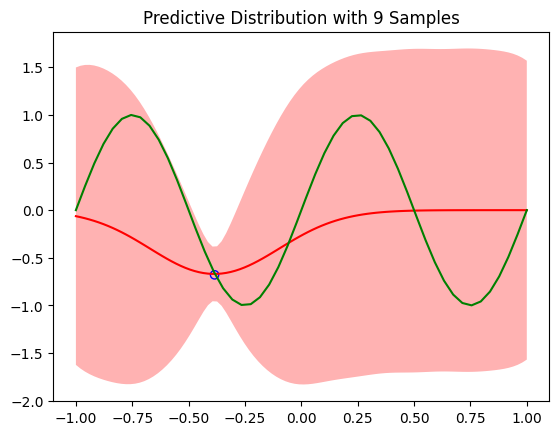

In [132]:
plotPreds(m1, S1, bmeans, bSD)
plotTruth()
plt.scatter(X[0:N], y[0:N], facecolors='none', edgecolors='b')

# Altogether

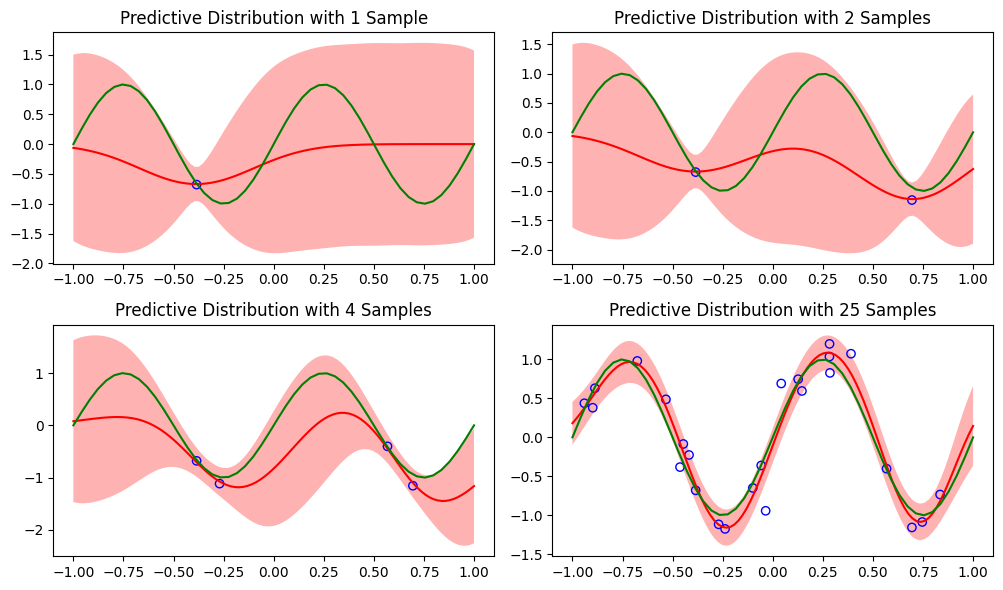

In [134]:
m1, S1 = getParams(X[0:1], y[0:1], m0, S0, beta, bmeans, bSD)
m2, S2 = getParams(X[0:2], y[0:2], m0, S0, beta, bmeans, bSD)
m4, S4 = getParams(X[0:4], y[0:4], m0, S0, beta, bmeans, bSD)
m25, S25 = getParams(X[0:25], y[0:25], m0, S0, beta, bmeans, bSD)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))

plotPreds(m1, S1, bmeans, bSD, beta, ax=ax[0, 0])
plotPreds(m2, S2, bmeans, bSD, beta, ax=ax[0, 1])
plotPreds(m4, S4, bmeans, bSD, beta, ax=ax[1, 0])
plotPreds(m25, S25, bmeans, bSD, beta, ax=ax[1, 1])

plotTruth(ax=ax[0, 0])
plotTruth(ax=ax[0, 1])
plotTruth(ax=ax[1, 0])
plotTruth(ax=ax[1, 1])

ax[0, 0].scatter(X[0:1], y[0:1], facecolors='none', edgecolors='b')
ax[0, 1].scatter(X[0:2], y[0:2], facecolors='none', edgecolors='b')
ax[1, 0].scatter(X[0:4], y[0:4], facecolors='none', edgecolors='b')
ax[1, 1].scatter(X[0:25], y[0:25], facecolors='none', edgecolors='b')

ax[0, 0].set_title(f'Predictive Distribution with 1 Sample')
ax[0, 1].set_title(f'Predictive Distribution with 2 Samples')
ax[1, 0].set_title(f'Predictive Distribution with 4 Samples')
ax[1, 1].set_title(f'Predictive Distribution with 25 Samples')

fig.tight_layout()